In [4]:
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
headers=calihouses.feature_names
df=pd.DataFrame(calidata,columns=headers)

In [7]:
print(df.shape)

(20640, 8)


In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


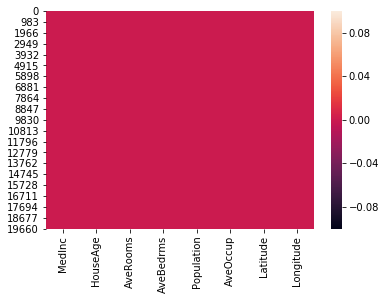

In [11]:
#To check missing value
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [13]:
#To check duplicate values
df.duplicated().sum()

0

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [15]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


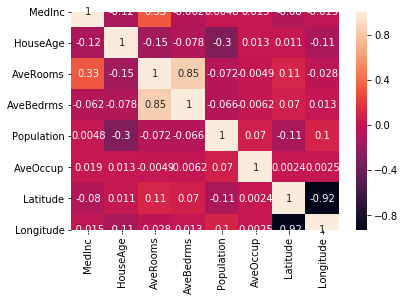

In [16]:
sns.heatmap(df.corr(),annot=True)

Ploting Outliers

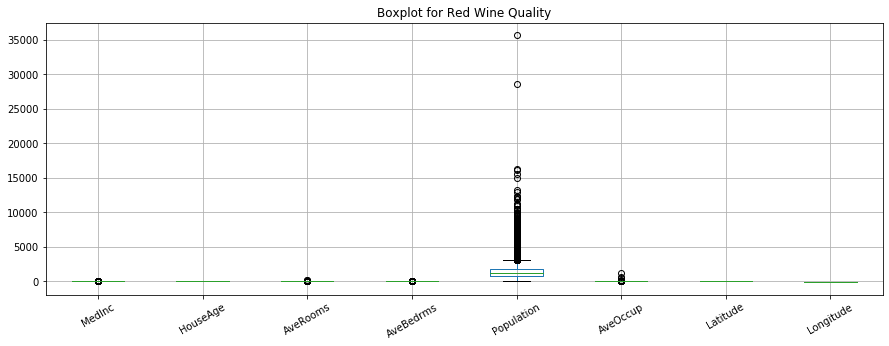

In [17]:
df.plot(kind='box',grid=True,title="Boxplot for Red Wine Quality",legend=True,rot=30,figsize=(15,5))

In [18]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(df))
df=df.loc[(z_score < 3).all(axis=1)]

In [19]:
#Check for Skewness
df.skew()

MedInc        0.786048
HouseAge      0.046496
AveRooms      0.555865
AveBedrms     3.913734
Population    1.346151
AveOccup      5.789707
Latitude      0.460162
Longitude    -0.292814
dtype: float64

In [20]:
for col in df.columns:
    if df.skew().loc[col] > 0.55:
        df[col]=np.log1p(df[col])

In [21]:
df.skew()

MedInc       -0.046003
HouseAge      0.046496
AveRooms     -0.303532
AveBedrms     2.880437
Population   -1.281355
AveOccup      0.801586
Latitude      0.460162
Longitude    -0.292814
dtype: float64

Exploring Data Variables

In [22]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.232720,41.0,2.077455,0.704982,5.777652,1.268511,37.88,-122.23
1,2.230165,21.0,1.979364,0.678988,7.784057,1.134572,37.86,-122.22


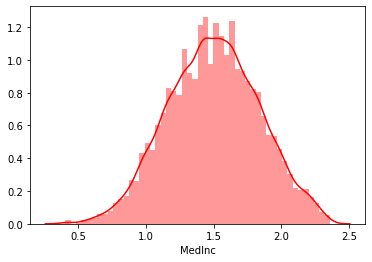

In [23]:
sns.distplot(df["MedInc"],color="red")

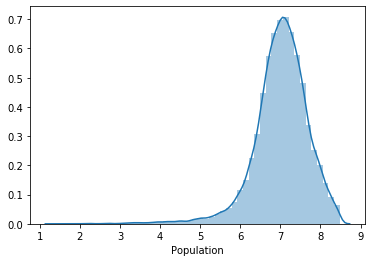

In [24]:
sns.distplot(df["Population"])

 Features and Target Value

In [25]:
x=df.drop(["MedInc"],axis=1)
y=df["MedInc"]

In [26]:
x.head(2)

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,2.077455,0.704982,5.777652,1.268511,37.88,-122.23
1,21.0,1.979364,0.678988,7.784057,1.134572,37.86,-122.22


In [27]:
y.head(2)

0    2.232720
1    2.230165
Name: MedInc, dtype: float64

In [28]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(19794, 1)

Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.96629447,  1.3416884 , -0.34016008, ..., -0.4231765 ,
         1.0499792 , -1.320935  ],
       [-0.64040157,  0.84527043, -0.77800615, ..., -1.1238093 ,
         1.04062055, -1.31594443],
       [ 1.84997729,  2.10729235,  0.06798123, ..., -0.07226093,
         1.03594122, -1.32592557],
       ...,
       [-0.96174078,  0.06631324,  0.4427218 , ..., -0.77287006,
         1.7752746 , -0.81688757],
       [-0.88140598,  0.1664171 ,  0.84953786, ..., -1.10137271,
         1.7752746 , -0.86679325],
       [-1.04207558,  0.1062579 ,  0.77448762, ..., -0.33357836,
         1.74719865, -0.8268687 ]])

Spilt Train and Test

In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
   
    
    return random_state

LinearRegression

In [52]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x000000218FF81048> 
is:  61 
and it produces 
 r2 score of  0.6435996585376189 
 mean abs error value of  0.1534611385485454 
 mean squared error value of 0.040215607065546506 
 & root mean sq error  0.20053829326476902

prediction:  [[1.49921407]
 [1.64753078]
 [1.4827634 ]
 ...
 [0.99815976]
 [1.95245737]
 [1.35864618]]


61

In [55]:
#cross validation
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
lr_scr=cross_val_score(lr,x,y,cv=loocv,scoring='neg_mean_squared_error')
print('the score at liner regression model is= ', lr_scr.mean())

the score at liner regression model is=  -0.04021073624875498


Decision Tree Regressor

In [58]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse','mae'],'max_depth':[6,8,9]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=10)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 8}

In [59]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=8)
mod(dtr,x,y)

the random state at  <function mod at 0x000000218FF81048> 
is:  67 
and it produces 
 r2 score of  0.6205284685811383 
 mean abs error value of  0.15570367259457524 
 mean squared error value of 0.042818920816642736 
 & root mean sq error  0.20692733221264595

prediction:  [1.66217104 1.42698967 1.55480476 ... 1.17308169 1.78225438 1.10324871]


67

In [60]:
#cross validation
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
dtr_scr=cross_val_score(dtr,x,y,cv=loocv,scoring='neg_mean_squared_error')
print('the score at liner regression model is= ', dtr_scr.mean())

the score at liner regression model is=  -0.04139963181353846


KNeighbors Regressor

In [61]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute','auto']}
k_grid=GridSearchCV(knr,k_para,cv=20)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 18}

In [62]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=18)
mod(knr,x,y)

the random state at  <function mod at 0x000000218FF81048> 
is:  105 
and it produces 
 r2 score of  0.6832330782662142 
 mean abs error value of  0.1417342008943884 
 mean squared error value of 0.035743439536387984 
 & root mean sq error  0.18905935453287676

prediction:  [[1.5835362 ]
 [1.71402225]
 [1.44526837]
 ...
 [1.16117476]
 [1.65066422]
 [1.44604804]]


105

In [63]:
#cross validation
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
knr_scr=cross_val_score(knr,x,y,cv=loocv,scoring='neg_mean_squared_error')
print('the score at liner regression model is= ', knr_scr.mean())

the score at liner regression model is=  -0.034442943380536585


AdaBoost Regressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

ada_param= {"learning_rate": [0.0001,0.025,0.1,1.0],"n_estimators":[250,500,750,1000]}

ada_g= GridSearchCV(ada,ada_param,cv=10)
ada_g.fit(x_train,y_train)
print("best parameters:", ada_g.best_params_)
print("\n best score:",ada_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 1000}

 best score: 0.5517548278294805


In [69]:
ada=AdaBoostRegressor(learning_rate=0.025, n_estimators=1000)
mod(ada,x,y)

the random state at  <function mod at 0x000000218FF81048> 
is:  44 
and it produces 
 r2 score of  0.5394235414047612 
 mean abs error value of  0.18184281105461092 
 mean squared error value of 0.05197066256027184 
 & root mean sq error  0.22797074935234968

prediction:  [1.59762993 1.5713377  1.33703182 ... 1.17011875 1.63681743 1.26371119]


44

In [ ]:
#cross validation
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
ada_scr=cross_val_score(ada,x,y,cv=loocv,scoring='neg_mean_squared_error')
print('the score at Ada Boost regression model is= ', ada_scr.mean())